In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/CleanedDataset.csv')
df.head()

,last_updated,tweet_id,created_at,full_text,processed_tweet,Party,quote_count,reply_count,retweet_count,Importance,...,Neutral,Positive,Negative,Compound,hashtags,user_mentions_screen_name,City,State,Country,Score
0,2019-02-08 17:29:00,1.090000e+18,2019-02-08 17:28:00,@DasComrade Sir any comment on modi's grand en...,dascomrad sir comment modi grand entri,BJP,0.0,0.0,1.0,0,...,0.625,0.375,0.000,0.4588,NaN,DasComrade,Guwahati,Assam,India,0.045645
1,2019-02-08 17:29:00,1.090000e+18,2019-02-07 05:10:00,Congress made Vemula national talking point ev...,congress made vemula nation talk point even th...,BJP,47.0,72.0,2353.0,1,...,0.868,0.000,0.132,-0.5719,NaN,NaN,Mumbai,Maharashtra,India,108.990410
2,2019-02-08 17:30:00,1.090000e+18,2019-02-08 10:18:00,BJP has been winning battles over the past mon...,bjp win battl past month bengal pm modi arriv ...,BJP,1.0,12.0,513.0,1,...,0.582,0.276,0.142,0.5719,NaN,NaN,Kolkata,West Bengal,India,24.487725
3,2019-02-08 17:30:00,1.090000e+18,2019-02-08 17:29:00,@inclusivemind2 @Ark82876233 @BJP4India @Rahul...,inclusivemind ark bjpindia rahul gandhi bjp th...,Other,0.0,0.0,2.0,0,...,0.884,0.116,0.000,0.4404,NaN,"inclusivemind2,Ark82876233,BJP4India,RahulGandhi",Aligarh,Uttar Pradesh,India,0.091290
4,2019-02-08 17:30:00,1.090000e+18,2019-02-08 14:19:00,Senior Congress leader @ManishTewari : There w...,senior congress leader manishtewari jpc defini...,Congress,0.0,1.0,159.0,1,...,1.000,0.000,0.000,0.0000,NaN,ManishTewari,New Delhi,Delhi,India,8.263217


In [ ]:
df.columns

Index(['last_updated', 'tweet_id', 'created_at', 'full_text',
       'processed_tweet', 'Party', 'quote_count', 'reply_count',
       'retweet_count', 'Importance', 'favorite_count', 'Neutral', 'Positive',
       'Negative', 'Compound', 'hashtags', 'user_mentions_screen_name', 'City',
       'State', 'Country', 'Score'],
      dtype='object')

In [ ]:
df = df[['processed_tweet','Party','Positive','Negative','Compound']]
df.head()

,processed_tweet,Party,Positive,Negative,Compound
0,dascomrad sir comment modi grand entri,BJP,0.375,0.000,0.4588
1,congress made vemula nation talk point even th...,BJP,0.000,0.132,-0.5719
2,bjp win battl past month bengal pm modi arriv ...,BJP,0.276,0.142,0.5719
3,inclusivemind ark bjpindia rahul gandhi bjp th...,Other,0.116,0.000,0.4404
4,senior congress leader manishtewari jpc defini...,Congress,0.000,0.000,0.0000


In [ ]:
df.drop(df[df['Party']== 'Other'].index, inplace = True)
df.shape

(36225, 5)

In [ ]:
mask = df[df['Party']== 'BJP']
mask

,processed_tweet,Party,Positive,Negative,Compound
0,dascomrad sir comment modi grand entri,BJP,0.375,0.000,0.4588
1,congress made vemula nation talk point even th...,BJP,0.000,0.132,-0.5719
2,bjp win battl past month bengal pm modi arriv ...,BJP,0.276,0.142,0.5719
8,stori realli expos develop propaganda nation c...,BJP,0.000,0.074,-0.2500
9,issu problem parrikar say defenc secretari res...,BJP,0.000,0.153,-0.4019
...,...,...,...,...,...
39865,chitrapadhi paper thin skin bjp leadersand hin...,BJP,0.126,0.313,-0.5653
39866,vote modi becom pm hindustan rahul gandhi get ...,BJP,0.000,0.000,0.0000
39867,agri minist radhamohanbjp told parliament ncrb...,BJP,0.000,0.000,0.0000
39872,bjp offic bearer fake assang s endors modi fol...,BJP,0.345,0.155,0.5859


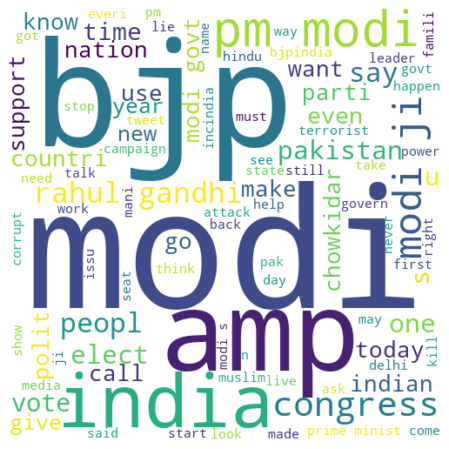

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')

spam_wc = wc.generate(' '.join([twts for twts in mask['processed_tweet']]))


plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(spam_wc, interpolation= 'bilinear')

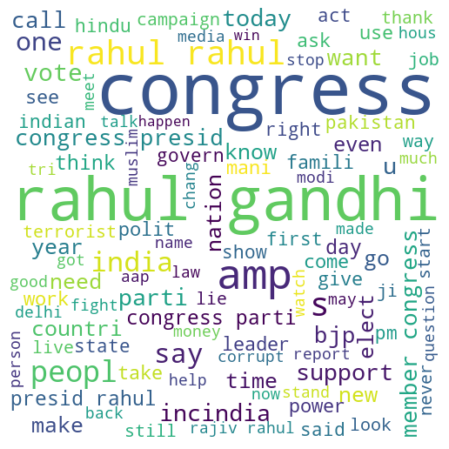

In [ ]:
mask2 = df[df['Party']== 'Congress']

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')

spam_wc = wc.generate(' '.join([twts for twts in mask2['processed_tweet']]))


plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(spam_wc, interpolation= 'bilinear')


In [ ]:
bjp = df[df['Party']== 'BJP']
bjp.drop(columns = ['Positive','Negative','Compound'],axis = 1, inplace = True)
cong = df[df['Party']== 'Congress']
cong.drop(columns = ['Positive','Negative','Compound'],axis = 1, inplace = True)
bjp

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,processed_tweet,Party
0,dascomrad sir comment modi grand entri,BJP
1,congress made vemula nation talk point even th...,BJP
2,bjp win battl past month bengal pm modi arriv ...,BJP
8,stori realli expos develop propaganda nation c...,BJP
9,issu problem parrikar say defenc secretari res...,BJP
...,...,...
39865,chitrapadhi paper thin skin bjp leadersand hin...,BJP
39866,vote modi becom pm hindustan rahul gandhi get ...,BJP
39867,agri minist radhamohanbjp told parliament ncrb...,BJP
39872,bjp offic bearer fake assang s endors modi fol...,BJP


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [ ]:
bjp['score'] = bjp['processed_tweet'].apply(lambda review: vader.polarity_scores(review))
bjp['compound']  = bjp['score'].apply(lambda score_dict: score_dict['compound'])
bjp['Sentiment'] = bjp['compound'].apply(lambda c: 1 if c >=0 else 0)
bjp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,processed_tweet,Party,score,compound,Sentiment
0,dascomrad sir comment modi grand entri,BJP,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.4588,1
1,congress made vemula nation talk point even th...,BJP,"{'neg': 0.132, 'neu': 0.868, 'pos': 0.0, 'comp...",-0.5719,0
2,bjp win battl past month bengal pm modi arriv ...,BJP,"{'neg': 0.142, 'neu': 0.582, 'pos': 0.276, 'co...",0.5719,1
8,stori realli expos develop propaganda nation c...,BJP,"{'neg': 0.074, 'neu': 0.926, 'pos': 0.0, 'comp...",-0.2500,0
9,issu problem parrikar say defenc secretari res...,BJP,"{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'comp...",-0.4019,0


In [ ]:
cong['score'] = cong['processed_tweet'].apply(lambda review: vader.polarity_scores(review))
cong['compound']  = cong['score'].apply(lambda score_dict: score_dict['compound'])
cong['Sentiment'] = cong['compound'].apply(lambda c: 1 if c >=0 else 0)
cong.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,processed_tweet,Party,score,compound,Sentiment
4,senior congress leader manishtewari jpc defini...,Congress,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
5,bc congress take kickback fr pp,Congress,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
6,rahulliecaught exclus former defenc secretari ...,Congress,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp...",-0.2960,0
7,expect meltdown congress elect wait till febru...,Congress,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
13,jim jordan remain best argument drug test memb...,Congress,"{'neg': 0.17, 'neu': 0.544, 'pos': 0.286, 'com...",0.4019,1


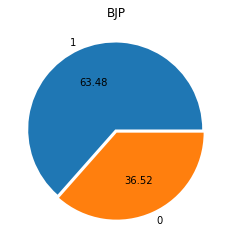

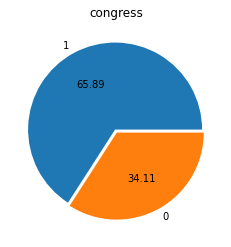

In [ ]:
plt.pie(bjp['Sentiment'].value_counts(), explode = [0.02,0.02], labels=['1','0'],autopct="%0.2f")
plt.title('BJP')
plt.show()
plt.pie(cong['Sentiment'].value_counts(), explode = [0.02,0.02], labels=['1','0'],autopct="%0.2f")
plt.title('congress')
plt.show()

In [ ]:
bjp[bjp['Compound']== 0.00]

,processed_tweet,Party,Positive,Negative,Compound,Sentiment
11,modiunstopp speech made noisi kharg amp compan...,BJP,0.085,0.111,-0.0,1
16,bjp mp sh ianuragthakur launch campaign abkiba...,BJP,0.000,0.000,0.0,1
21,india defenceministri sidelin parallel negoti ...,BJP,0.000,0.000,0.0,1
29,defenc minist nirmala sitharaman came heavili ...,BJP,0.000,0.000,0.0,1
30,ippatel modi essenti,BJP,0.000,0.000,0.0,1
...,...,...,...,...,...,...
39846,watch local tmc leader enter vote counter vote...,BJP,0.000,0.000,0.0,1
39854,rss indiaspecif diseas amp almost becom nation...,BJP,0.000,0.000,0.0,1
39864,video evid bjp goon amit shah s road show kolk...,BJP,0.000,0.000,0.0,1
39866,vote modi becom pm hindustan rahul gandhi get ...,BJP,0.000,0.000,0.0,1
